In [1]:
from pyspark.sql import SparkSession


In [2]:
spark = SparkSession.builder.appName("Covid19Analysis").getOrCreate()


In [3]:
# Load the CSV data into a DataFrame
df = spark.read.csv("/home/jovyan/work/worldometer_data.csv", header=True, inferSchema=True)

In [4]:
df.show(5)

+--------------+-------------+----------+----------+--------+-----------+---------+--------------+------------+-----------+----------------+----------------+-------------+----------+------------+--------------+
|Country/Region|    Continent|Population|TotalCases|NewCases|TotalDeaths|NewDeaths|TotalRecovered|NewRecovered|ActiveCases|Serious,Critical|Tot Cases/1M pop|Deaths/1M pop|TotalTests|Tests/1M pop|    WHO Region|
+--------------+-------------+----------+----------+--------+-----------+---------+--------------+------------+-----------+----------------+----------------+-------------+----------+------------+--------------+
|           USA|North America| 331198130|   5032179|    NULL|     162804|     NULL|       2576668|        NULL|    2292707|           18296|           15194|        492.0|  63139605|      190640|      Americas|
|        Brazil|South America| 212710692|   2917562|    NULL|      98644|     NULL|       2047660|        NULL|     771258|            8318|           13716

In [5]:
df.describe().show()


+-------+--------------+-------------+--------------------+----------------+------------------+------------------+-----------------+------------------+-----------------+------------------+------------------+------------------+-----------------+------------------+------------------+--------------+
|summary|Country/Region|    Continent|          Population|      TotalCases|          NewCases|       TotalDeaths|        NewDeaths|    TotalRecovered|     NewRecovered|       ActiveCases|  Serious,Critical|  Tot Cases/1M pop|    Deaths/1M pop|        TotalTests|      Tests/1M pop|    WHO Region|
+-------+--------------+-------------+--------------------+----------------+------------------+------------------+-----------------+------------------+-----------------+------------------+------------------+------------------+-----------------+------------------+------------------+--------------+
|  count|           209|          208|                 208|             209|                 4|           

In [6]:
import pandas as pd

# Convert to Pandas DataFrame
df_for_display = df.limit(5).toPandas()
df_for_display.head(5)

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,331198130,5032179,NaN,162804,NaN,2576668,NaN,2292707,18296,15194,492.0,63139605,190640,Americas
1,Brazil,South America,212710692,2917562,NaN,98644,NaN,2047660,NaN,771258,8318,13716,464.0,13206188,62085,Americas
2,India,Asia,1381344997,2025409,NaN,41638,NaN,1377384,NaN,606387,8944,1466,30.0,22149351,16035,South-EastAsia
3,Russia,Europe,145940924,871894,NaN,14606,NaN,676357,NaN,180931,2300,5974,100.0,29716907,203623,Europe
4,South Africa,Africa,59381566,538184,NaN,9604,NaN,387316,NaN,141264,539,9063,162.0,3149807,53044,Africa


In [7]:
df_for_display.describe()

,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop
count,5.000000e+00,5.000000e+00,0.0,5.000000,0.0,5.000000e+00,0.0,5.000000e+00,5.000000,5.000000,5.000000,5.000000e+00,5.000000
mean,4.261153e+08,2.277046e+06,NaN,65459.200000,NaN,1.413077e+06,NaN,7.985094e+05,7679.400000,9082.600000,249.600000,2.627237e+07,105085.400000
std,5.431404e+08,1.807099e+06,NaN,64904.818629,NaN,9.155402e+05,NaN,8.780169e+05,6975.716365,5623.477109,213.894366,2.287704e+07,85901.926127
min,5.938157e+07,5.381840e+05,NaN,9604.000000,NaN,3.873160e+05,NaN,1.412640e+05,539.000000,1466.000000,30.000000,3.149807e+06,16035.000000
25%,1.459409e+08,8.718940e+05,NaN,14606.000000,NaN,6.763570e+05,NaN,1.809310e+05,2300.000000,5974.000000,100.000000,1.320619e+07,53044.000000
50%,2.127107e+08,2.025409e+06,NaN,41638.000000,NaN,1.377384e+06,NaN,6.063870e+05,8318.000000,9063.000000,162.000000,2.214935e+07,62085.000000
75%,3.311981e+08,2.917562e+06,NaN,98644.000000,NaN,2.047660e+06,NaN,7.712580e+05,8944.000000,13716.000000,464.000000,2.971691e+07,190640.000000
max,1.381345e+09,5.032179e+06,NaN,162804.000000,NaN,2.576668e+06,NaN,2.292707e+06,18296.000000,15194.000000,492.000000,6.313960e+07,203623.000000


In [8]:
from pyspark.sql import functions as F

In [9]:
columns = df.columns
# Count NULL values for each column
nan_counts = df.select([F.sum(F.col(column).isNull().cast("int")).alias(column) for column in columns])
nan_counts.show()

+--------------+---------+----------+----------+--------+-----------+---------+--------------+------------+-----------+----------------+----------------+-------------+----------+------------+----------+
|Country/Region|Continent|Population|TotalCases|NewCases|TotalDeaths|NewDeaths|TotalRecovered|NewRecovered|ActiveCases|Serious,Critical|Tot Cases/1M pop|Deaths/1M pop|TotalTests|Tests/1M pop|WHO Region|
+--------------+---------+----------+----------+--------+-----------+---------+--------------+------------+-----------+----------------+----------------+-------------+----------+------------+----------+
|             0|        1|         1|         0|     205|         21|      206|             4|         206|          4|              87|               1|           22|        18|          18|        25|
+--------------+---------+----------+----------+--------+-----------+---------+--------------+------------+-----------+----------------+----------------+-------------+----------+----------

In [10]:
# Step 1: Fill NaN values with 0 for NewCases, NewDeaths, and NewRecovered
df = df.fillna({
    'NewCases': 0,
    'NewDeaths': 0,
    'NewRecovered': 0
})

In [11]:
# Step 2: Update Total Cases, Total Deaths, and Total Recovered
df = df.withColumn("TotalCases", F.col("TotalCases") + F.col("NewCases"))
df = df.withColumn("TotalDeaths", F.col("TotalDeaths") + F.col("NewDeaths"))
df = df.withColumn("TotalRecovered", F.col("TotalRecovered") + F.col("NewRecovered"))

# Step 3: Drop the NewCases, NewDeaths, and NewRecovered columns
df = df.drop("NewCases", "NewDeaths", "NewRecovered")

In [12]:
# Show the updated DataFrame
df_for_display_1 = df.limit(7).toPandas()
df_for_display_1.head(7)

,Country/Region,Continent,Population,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,331198130,5032179,162804,2576668,2292707,18296,15194,492.0,63139605,190640,Americas
1,Brazil,South America,212710692,2917562,98644,2047660,771258,8318,13716,464.0,13206188,62085,Americas
2,India,Asia,1381344997,2025409,41638,1377384,606387,8944,1466,30.0,22149351,16035,South-EastAsia
3,Russia,Europe,145940924,871894,14606,676357,180931,2300,5974,100.0,29716907,203623,Europe
4,South Africa,Africa,59381566,538184,9604,387316,141264,539,9063,162.0,3149807,53044,Africa
5,Mexico,North America,129066160,469280,51336,312988,103325,3987,3585,391.0,1056915,8189,Americas
6,Peru,South America,33016319,455409,20424,310337,124648,1426,13793,619.0,2493429,75521,Americas


In [13]:
# Step 4: Fill missing values for TotalDeaths and TotalRecovered
df = df.withColumn("TotalDeaths", 
                   F.when(F.col("TotalDeaths").isNull(), F.col("TotalCases") - F.col("TotalRecovered"))
                    .otherwise(F.col("TotalDeaths")))

df = df.withColumn("TotalRecovered", 
                   F.when(F.col("TotalRecovered").isNull(), F.col("TotalCases") - F.col("TotalDeaths"))
                    .otherwise(F.col("TotalRecovered")))

In [14]:
columns = df.columns
# Count NULL values for each column
nan_counts = df.select([F.sum(F.col(column).isNull().cast("int")).alias(column) for column in columns])
nan_counts.show()

+--------------+---------+----------+----------+-----------+--------------+-----------+----------------+----------------+-------------+----------+------------+----------+
|Country/Region|Continent|Population|TotalCases|TotalDeaths|TotalRecovered|ActiveCases|Serious,Critical|Tot Cases/1M pop|Deaths/1M pop|TotalTests|Tests/1M pop|WHO Region|
+--------------+---------+----------+----------+-----------+--------------+-----------+----------------+----------------+-------------+----------+------------+----------+
|             0|        1|         1|         0|          0|             0|          4|              87|               1|           22|        18|          18|        25|
+--------------+---------+----------+----------+-----------+--------------+-----------+----------------+----------------+-------------+----------+------------+----------+



In [15]:
df = df.filter(F.col("Tot Cases/1M pop").isNotNull())
df = df.filter(F.col("Continent").isNotNull())
df = df.filter(F.col("Tot Cases/1M pop").isNotNull())

In [16]:
columns = df.columns
# Count NULL values for each column
nan_counts = df.select([F.sum(F.col(column).isNull().cast("int")).alias(column) for column in columns])
nan_counts.show()

+--------------+---------+----------+----------+-----------+--------------+-----------+----------------+----------------+-------------+----------+------------+----------+
|Country/Region|Continent|Population|TotalCases|TotalDeaths|TotalRecovered|ActiveCases|Serious,Critical|Tot Cases/1M pop|Deaths/1M pop|TotalTests|Tests/1M pop|WHO Region|
+--------------+---------+----------+----------+-----------+--------------+-----------+----------------+----------------+-------------+----------+------------+----------+
|             0|        0|         0|         0|          0|             0|          4|              87|               0|           21|        17|          17|        24|
+--------------+---------+----------+----------+-----------+--------------+-----------+----------------+----------------+-------------+----------+------------+----------+



In [17]:
df = df.withColumn("WHO Region", F.when(F.col("WHO Region").isNull(), F.col("Continent")).otherwise(F.col("WHO Region")))

df = df.withColumn(
    "Deaths/1M pop",
    F.when(F.col("Deaths/1M pop").isNull(), (F.col("TotalDeaths") / F.col("Population")) * 1_000_000)
     .otherwise(F.col("Deaths/1M pop"))
)

In [18]:
columns = df.columns
# Count NULL values for each column
nan_counts = df.select([F.sum(F.col(column).isNull().cast("int")).alias(column) for column in columns])
nan_counts.show()

+--------------+---------+----------+----------+-----------+--------------+-----------+----------------+----------------+-------------+----------+------------+----------+
|Country/Region|Continent|Population|TotalCases|TotalDeaths|TotalRecovered|ActiveCases|Serious,Critical|Tot Cases/1M pop|Deaths/1M pop|TotalTests|Tests/1M pop|WHO Region|
+--------------+---------+----------+----------+-----------+--------------+-----------+----------------+----------------+-------------+----------+------------+----------+
|             0|        0|         0|         0|          0|             0|          4|              87|               0|            0|        17|          17|         0|
+--------------+---------+----------+----------+-----------+--------------+-----------+----------------+----------------+-------------+----------+------------+----------+



In [19]:
# Fill missing ActiveCases using the formula
df = df.withColumn(
    "ActiveCases",
    F.when(
        F.col("ActiveCases").isNull(),
        F.col("TotalCases") - (F.col("TotalRecovered") + F.col("TotalDeaths"))
    ).otherwise(F.col("ActiveCases"))
)

In [20]:
columns = df.columns
# Count NULL values for each column
nan_counts = df.select([F.sum(F.col(column).isNull().cast("int")).alias(column) for column in columns])
nan_counts.show()

+--------------+---------+----------+----------+-----------+--------------+-----------+----------------+----------------+-------------+----------+------------+----------+
|Country/Region|Continent|Population|TotalCases|TotalDeaths|TotalRecovered|ActiveCases|Serious,Critical|Tot Cases/1M pop|Deaths/1M pop|TotalTests|Tests/1M pop|WHO Region|
+--------------+---------+----------+----------+-----------+--------------+-----------+----------------+----------------+-------------+----------+------------+----------+
|             0|        0|         0|         0|          0|             0|          0|              87|               0|            0|        17|          17|         0|
+--------------+---------+----------+----------+-----------+--------------+-----------+----------------+----------------+-------------+----------+------------+----------+



In [21]:
# Drop the Serious,Critical column
df = df.drop("Serious,Critical")

In [22]:
df = df.withColumn(
    "TotalTests",
    F.when(
        F.col("TotalTests").isNull() & (F.col("ActiveCases") > 0),
        (F.col("TotalCases") / F.col("ActiveCases")) * F.col("Population")
    ).otherwise(F.col("TotalTests"))
)

In [23]:
columns = df.columns
# Count NULL values for each column
nan_counts = df.select([F.sum(F.col(column).isNull().cast("int")).alias(column) for column in columns])
nan_counts.show()

+--------------+---------+----------+----------+-----------+--------------+-----------+----------------+-------------+----------+------------+----------+
|Country/Region|Continent|Population|TotalCases|TotalDeaths|TotalRecovered|ActiveCases|Tot Cases/1M pop|Deaths/1M pop|TotalTests|Tests/1M pop|WHO Region|
+--------------+---------+----------+----------+-----------+--------------+-----------+----------------+-------------+----------+------------+----------+
|             0|        0|         0|         0|          0|             0|          0|               0|            0|         1|          17|         0|
+--------------+---------+----------+----------+-----------+--------------+-----------+----------------+-------------+----------+------------+----------+



In [24]:
df = df.filter(F.col("TotalTests").isNotNull())

df = df.withColumn("Tests/1M pop",
                   F.when(F.col("TotalTests").isNotNull(), (F.col("TotalTests") / F.col("Population")) * 1000000)
                    .otherwise(F.col("Tests/1M pop")))

In [25]:
columns = df.columns
# Count NULL values for each column
nan_counts = df.select([F.sum(F.col(column).isNull().cast("int")).alias(column) for column in columns])
nan_counts.show()

+--------------+---------+----------+----------+-----------+--------------+-----------+----------------+-------------+----------+------------+----------+
|Country/Region|Continent|Population|TotalCases|TotalDeaths|TotalRecovered|ActiveCases|Tot Cases/1M pop|Deaths/1M pop|TotalTests|Tests/1M pop|WHO Region|
+--------------+---------+----------+----------+-----------+--------------+-----------+----------------+-------------+----------+------------+----------+
|             0|        0|         0|         0|          0|             0|          0|               0|            0|         0|           0|         0|
+--------------+---------+----------+----------+-----------+--------------+-----------+----------------+-------------+----------+------------+----------+



In [26]:
from pyspark.sql.functions import avg

# Add a new column for Recoveries per million population
df = df.withColumn("Recoveries/1M pop", (F.col("TotalRecovered") / F.col("Population")) * 1_000_000)

# Aggregating relevant metrics per continent
continent_df = df.groupBy("Continent").agg(
    avg("Tot Cases/1M pop").alias("Avg Cases/1M pop"),
    avg("Deaths/1M pop").alias("Avg Deaths/1M pop"),
    avg("Recoveries/1M pop").alias("Avg Recoveries/1M pop"),
    avg("Population").alias("Avg Population")
)


In [27]:
from pyspark.sql.functions import expr

# Adding Mortality Rate and Recovery Rate as percentage metrics
continent_df = continent_df.withColumn(
    "Mortality Rate (%)", expr("(`Avg Deaths/1M pop` / `Avg Cases/1M pop`) * 100")
).withColumn(
    "Recovery Rate (%)", expr("(`Avg Recoveries/1M pop` / `Avg Cases/1M pop`) * 100")
)


In [28]:
# Show the updated DataFrame
continent_df_for_display = continent_df.limit(7).toPandas()
continent_df_for_display.head(6)

,Continent,Avg Cases/1M pop,Avg Deaths/1M pop,Avg Recoveries/1M pop,Avg Population,Mortality Rate (%),Recovery Rate (%)
0,Europe,4137.723404,241.807321,3305.807386,1.590802e+07,5.843970,79.894354
1,Africa,1130.807018,18.239554,826.777218,2.357045e+07,1.612968,73.113909
2,Australia/Oceania,241.000000,3.735936,176.132169,6.826318e+06,1.550181,73.083888
3,North America,2529.914286,98.537636,1444.423015,1.684296e+07,3.894900,57.093753
4,South America,7745.785714,201.285714,5806.694620,3.079360e+07,2.598648,74.965857
5,Asia,4008.937500,39.067737,3404.515048,6.611784e+07,0.974516,84.923126


In [29]:
continent_df_pandas = continent_df.toPandas()

In [30]:
!pip install pymongo

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 2.1 MB/s eta 0:00:0000:0100:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 2.7 MB/s eta 0:00:00a 0:00:01


In [34]:
from pymongo import MongoClient

# MongoDB setup
client = MongoClient("mongodb://host.docker.internal:27017/")
print(client.server_info())

{'version': '8.0.3', 'gitVersion': '89d97f2744a2b9851ddfb51bdf22f687562d9b06', 'targetMinOS': 'Windows 7/Windows Server 2008 R2', 'modules': [], 'allocator': 'tcmalloc-gperf', 'javascriptEngine': 'mozjs', 'sysInfo': 'deprecated', 'versionArray': [8, 0, 3, 0], 'openssl': {'running': 'Windows SChannel'}, 'buildEnvironment': {'distmod': 'windows', 'distarch': 'x86_64', 'cc': 'cl: Microsoft (R) C/C++ Optimizing Compiler Version 19.31.31107 for x64', 'ccflags': '/nologo /WX /FImongo/platform/basic.h /fp:strict /EHsc /W3 /wd4068 /wd4244 /wd4267 /wd4290 /wd4351 /wd4355 /wd4373 /wd4800 /wd4251 /wd4291 /we4013 /we4099 /we4930 /errorReport:none /MD /O2 /Oy- /bigobj /utf-8 /permissive- /Zc:__cplusplus /Zc:sizedDealloc /volatile:iso /diagnostics:caret /std:c++20 /Gw /Gy /Zc:inline', 'cxx': 'cl: Microsoft (R) C/C++ Optimizing Compiler Version 19.31.31107 for x64', 'cxxflags': '/TP', 'linkflags': '/nologo /DEBUG /INCREMENTAL:NO /LARGEADDRESSAWARE /OPT:REF', 'target_arch': 'x86_64', 'target_os': 'win

In [35]:

db = client["covid19_analysis"]
collection = db["continent_summary"]

continent_records = continent_df_pandas.to_dict(orient="records")

# Insert data into MongoDB
collection.insert_many(continent_records)
print("Data inserted into MongoDB successfully.")

Data inserted into MongoDB successfully.


In [36]:
for record in collection.find():
    print(record)

{'_id': ObjectId('672a0137774c9ca160c2fab8'), 'Continent': 'Europe', 'Avg Cases/1M pop': 4137.723404255319, 'Avg Deaths/1M pop': 241.80732061372538, 'Avg Recoveries/1M pop': 3305.807386429436, 'Avg Population': 15908015.851063829, 'Mortality Rate (%)': 5.843970149504092, 'Recovery Rate (%)': 79.89435405541309}
{'_id': ObjectId('672a0137774c9ca160c2fab9'), 'Continent': 'Africa', 'Avg Cases/1M pop': 1130.8070175438597, 'Avg Deaths/1M pop': 18.239553970099344, 'Avg Recoveries/1M pop': 826.7772176028874, 'Avg Population': 23570447.175438598, 'Mortality Rate (%)': 1.6129678793218047, 'Recovery Rate (%)': 73.11390933871878}
{'_id': ObjectId('672a0137774c9ca160c2faba'), 'Continent': 'Australia/Oceania', 'Avg Cases/1M pop': 241.0, 'Avg Deaths/1M pop': 3.7359357507447677, 'Avg Recoveries/1M pop': 176.13216896279516, 'Avg Population': 6826318.166666667, 'Mortality Rate (%)': 1.5501808094376628, 'Recovery Rate (%)': 73.08388753642953}
{'_id': ObjectId('672a0137774c9ca160c2fabb'), 'Continent': 'No

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for the visualizations
sns.set(style="whitegrid")

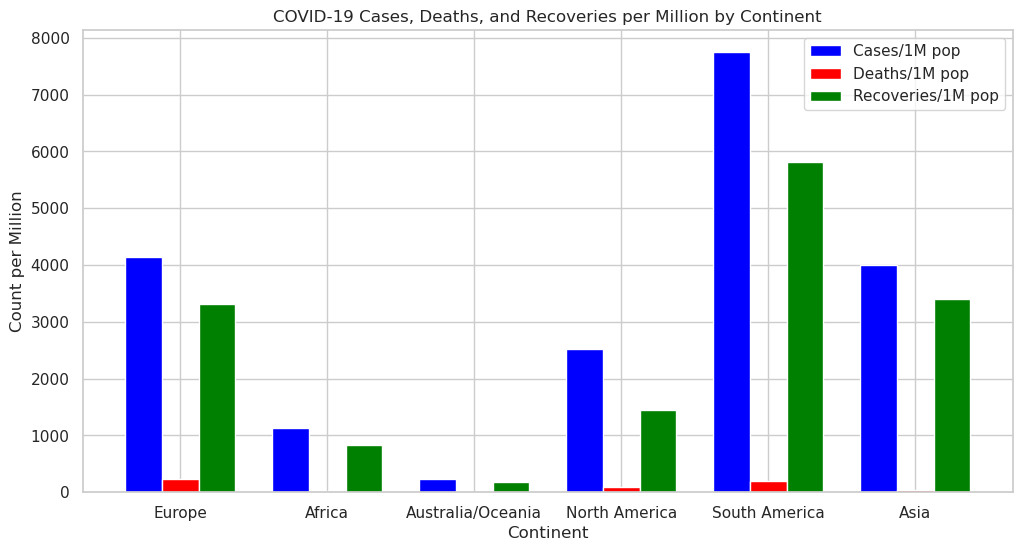

In [39]:
# Set up the data for plotting
continents = continent_df.select("Continent").rdd.flatMap(lambda x: x).collect()
avg_cases_per_million = continent_df.select("Avg Cases/1M pop").rdd.flatMap(lambda x: x).collect()
avg_deaths_per_million = continent_df.select("Avg Deaths/1M pop").rdd.flatMap(lambda x: x).collect()
avg_recoveries_per_million = continent_df.select("Avg Recoveries/1M pop").rdd.flatMap(lambda x: x).collect()

# Bar Chart for Cases, Deaths, and Recoveries per Million by Continent
x = range(len(continents))
plt.figure(figsize=(12, 6))
plt.bar(x, avg_cases_per_million, width=0.25, label="Cases/1M pop", color='blue', align='center')
plt.bar([p + 0.25 for p in x], avg_deaths_per_million, width=0.25, label="Deaths/1M pop", color='red', align='center')
plt.bar([p + 0.5 for p in x], avg_recoveries_per_million, width=0.25, label="Recoveries/1M pop", color='green', align='center')

plt.xlabel('Continent')
plt.ylabel('Count per Million')
plt.title('COVID-19 Cases, Deaths, and Recoveries per Million by Continent')
plt.xticks([p + 0.25 for p in x], continents)
plt.legend()
plt.show()

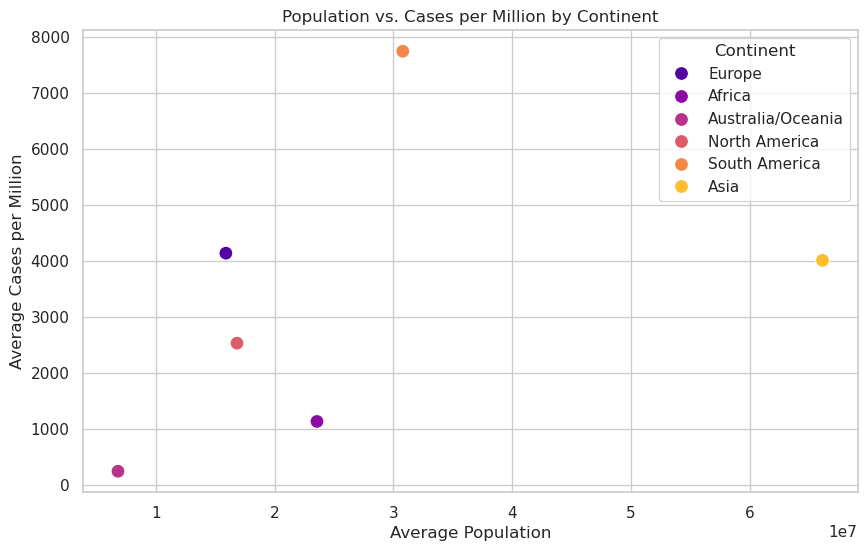

In [40]:
# Prepare data for Population vs Cases scatter plot
avg_population = continent_df.select("Avg Population").rdd.flatMap(lambda x: x).collect()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=avg_population, y=avg_cases_per_million, hue=continents, s=100, palette="plasma")
plt.xlabel("Average Population")
plt.ylabel("Average Cases per Million")
plt.title("Population vs. Cases per Million by Continent")
plt.legend(title="Continent")
plt.show()

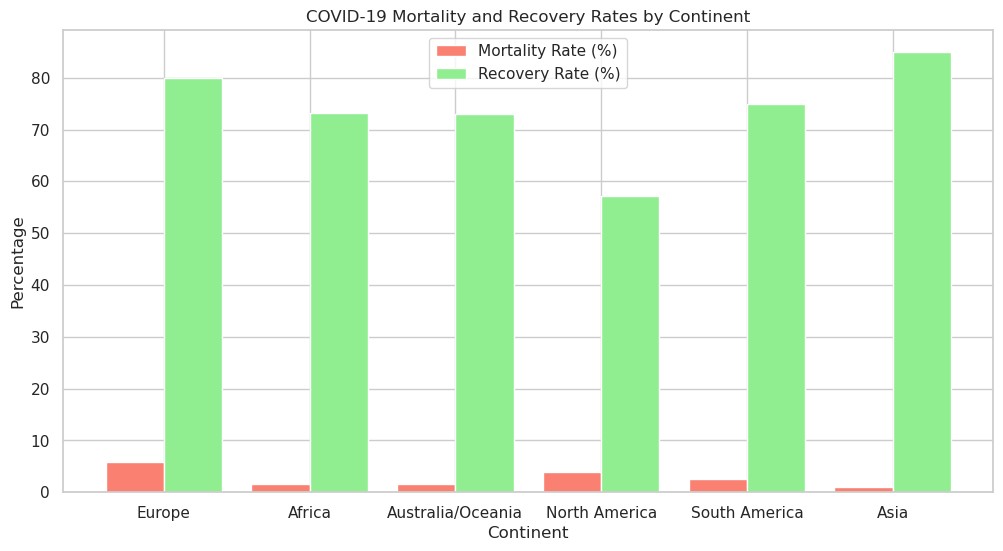

In [41]:
# Extract data for Mortality and Recovery Rates
mortality_rates = continent_df.select("Mortality Rate (%)").rdd.flatMap(lambda x: x).collect()
recovery_rates = continent_df.select("Recovery Rate (%)").rdd.flatMap(lambda x: x).collect()

x = range(len(continents))
plt.figure(figsize=(12, 6))
plt.bar(x, mortality_rates, width=0.4, label="Mortality Rate (%)", color='salmon')
plt.bar([p + 0.4 for p in x], recovery_rates, width=0.4, label="Recovery Rate (%)", color='lightgreen')

plt.xlabel('Continent')
plt.ylabel('Percentage')
plt.title('COVID-19 Mortality and Recovery Rates by Continent')
plt.xticks([p + 0.2 for p in x], continents)
plt.legend()
plt.show()
